In [1]:
import os 
import mrcfile
import glob 
from PIL import Image

DIR_NAME = "/media/kyohei/forAI/mrc_by_MotionCor/"
dir_path = DIR_NAME

file_list = glob.glob(dir_path + "**/*.mrc", recursive=True)
short_list = sorted([
    f for f in file_list
        if "/shortTIFF/" in f
        if os.path.exists(f.replace("/shortTIFF/", "/cryoEM-data/"))
    ])

original_list = [f.replace("/shortTIFF/", "/cryoEM-data/") for f in short_list]
original_list = sorted([f for f in original_list if os.path.exists(f)])


In [2]:
import sys
sys.path.append("../src/utils/")
from utils import clip_image, split_image

In [3]:
import numpy as np

def split_image(image, n=10):
    height, width = image.shape
    tile_height, tile_width = height // n, width // n

    tiles = []
    for i in range(n):
        for j in range(n):
            #print([i*tile_height, (i+1)*tile_height," | ", j*tile_width,(j+1)*tile_width])
            tile = image[i*tile_height:(i+1)*tile_height, j*tile_width:(j+1)*tile_width]
            tiles.append(tile)

    return tiles


def read_mrc(m):
    with mrcfile.open(m) as mrc:
        data = mrc.data
    return data


def save_image(data, outpath):
    with mrcfile.new(outpath, overwrite=True) as mrc:
        mrc.set_data(data)
    print(outpath, " saved")


In [4]:
for m in short_list:
    data = read_mrc(m)
    data = clip_image(data)
    print(data.shape)
    tiles = split_image(data)
    op = m.replace("/media/kyohei/forAI/mrc_by_MotionCor/", "/media/kyohei/forAI/split_images/")
    assert m!=op
    
    opdir = "/".join(op.split("/")[:-1])
    os.system(f"mkdir -p {opdir}")
    for ii, t in enumerate(tiles):
        save_image(t, op.replace(".mrc", f"__split{ii}.mrc"))
    


(4092, 5760)
/media/kyohei/forAI/split_images/shortTIFF/10877/FoilHole_18713375_Data_18711503_18711505_20201219_063535_fractions__split0.mrc  saved
/media/kyohei/forAI/split_images/shortTIFF/10877/FoilHole_18713375_Data_18711503_18711505_20201219_063535_fractions__split1.mrc  saved
/media/kyohei/forAI/split_images/shortTIFF/10877/FoilHole_18713375_Data_18711503_18711505_20201219_063535_fractions__split2.mrc  saved
/media/kyohei/forAI/split_images/shortTIFF/10877/FoilHole_18713375_Data_18711503_18711505_20201219_063535_fractions__split3.mrc  saved
/media/kyohei/forAI/split_images/shortTIFF/10877/FoilHole_18713375_Data_18711503_18711505_20201219_063535_fractions__split4.mrc  saved
/media/kyohei/forAI/split_images/shortTIFF/10877/FoilHole_18713375_Data_18711503_18711505_20201219_063535_fractions__split5.mrc  saved
/media/kyohei/forAI/split_images/shortTIFF/10877/FoilHole_18713375_Data_18711503_18711505_20201219_063535_fractions__split6.mrc  saved
/media/kyohei/forAI/split_images/shortTIFF

In [5]:

for m in original_list:
    data = read_mrc(m)
    data = clip_image(data)
    tiles = split_image(data)
    op = m.replace("/media/kyohei/forAI/mrc_by_MotionCor/", "/media/kyohei/forAI/split_images/")
    assert m!=op
    
    opdir = "/".join(op.split("/")[:-1])
    os.system(f"mkdir -p {opdir}")
    for ii, t in enumerate(tiles):
        save_image(t, op.replace(".mrc", f"__split{ii}.mrc"))
    


/media/kyohei/forAI/split_images/cryoEM-data/10877/FoilHole_18713375_Data_18711503_18711505_20201219_063535_fractions__split0.mrc  saved
/media/kyohei/forAI/split_images/cryoEM-data/10877/FoilHole_18713375_Data_18711503_18711505_20201219_063535_fractions__split1.mrc  saved
/media/kyohei/forAI/split_images/cryoEM-data/10877/FoilHole_18713375_Data_18711503_18711505_20201219_063535_fractions__split2.mrc  saved
/media/kyohei/forAI/split_images/cryoEM-data/10877/FoilHole_18713375_Data_18711503_18711505_20201219_063535_fractions__split3.mrc  saved
/media/kyohei/forAI/split_images/cryoEM-data/10877/FoilHole_18713375_Data_18711503_18711505_20201219_063535_fractions__split4.mrc  saved
/media/kyohei/forAI/split_images/cryoEM-data/10877/FoilHole_18713375_Data_18711503_18711505_20201219_063535_fractions__split5.mrc  saved
/media/kyohei/forAI/split_images/cryoEM-data/10877/FoilHole_18713375_Data_18711503_18711505_20201219_063535_fractions__split6.mrc  saved
/media/kyohei/forAI/split_images/cryoEM-d

In [6]:
op

'/media/kyohei/forAI/split_images/cryoEM-data/11387/2022-03-08_21.56.18_GP162-2_276_019.mrc'

In [7]:
m.replace("/media/kyohei/forAI/mrc_by_MotionCor/", "/media/kyohei/forAI/split_images/")

'/media/kyohei/forAI/split_images/cryoEM-data/11387/2022-03-08_21.56.18_GP162-2_276_019.mrc'

In [8]:
tiles[0].shape

(371, 383)

In [9]:
tiles[0]

array([[20.397903, 27.614643, 45.54    , ..., 33.59465 , 28.249577,
        22.001242],
       [25.85302 , 28.048641, 28.522343, ..., 37.41868 , 33.375534,
        29.844593],
       [23.21511 , 37.415264, 44.916058, ..., 25.521461, 29.517982,
        27.87221 ],
       ...,
       [27.495592, 22.774744, 45.54    , ..., 37.82202 , 42.57791 ,
        31.923668],
       [28.420528, 32.502438, 28.076857, ..., 29.434885, 22.160156,
        16.935013],
       [42.178852, 23.732456, 26.382349, ..., 44.00302 , 40.053722,
        32.119564]], dtype=float32)

# check

In [10]:
dir_path = "/media/kyohei/forAI/split_images/"
file_list = glob.glob(dir_path + "**/*.mrc", recursive=True)


In [11]:

short_list = sorted([
    f for f in file_list
        if "/shortTIFF/" in f
#         if os.path.exists(f.replace("/shortTIFF/", "/cryoEM-data/"))
    ])

original_list = [f.replace("/shortTIFF/", "/cryoEM-data/") for f in short_list]
original_list = sorted([f for f in original_list if os.path.exists(f)])


In [12]:
for f,o in zip(file_list, original_list):
    assert read_mrc(f).shape == read_mrc(o).shape
#     break

In [13]:
len(short_list), len(original_list)

(7500, 7500)

In [14]:
# gain data
# m = "/media/kyohei/forAI/cryoEM-data/10828/gain.mrc"

In [15]:
# !head /media/kyohei/forAI/cryoEM-data/10828/gain.mrc

# MRC file format

https://www.ccpem.ac.uk/mrc_format/mrc2014.php

2d


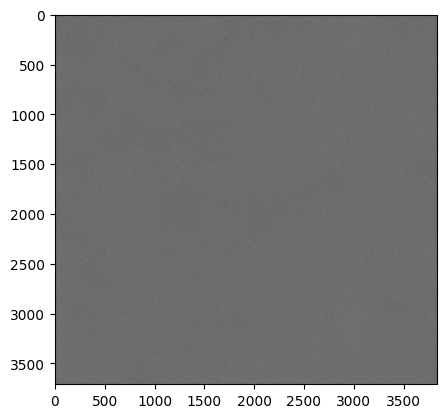

In [16]:
import mrcfile
import matplotlib.pyplot as plt

with mrcfile.open(m) as mrc:
    data = mrc.data

# For 2D image
if data.ndim == 2:
    print("2d")
    plt.imshow(data, cmap='gray')
    plt.show()

# For 3D volume, show one slice
elif data.ndim == 3:
    print("3d")
    plt.imshow(data[0, :, :], cmap='gray')  # Change the index to view different slices
    plt.show()

In [17]:
data

array([[20.397903, 27.614643, 46.310432, ..., 19.242329, 31.328812,
        39.212437],
       [25.85302 , 28.048641, 28.522343, ..., 32.90503 , 36.515972,
        18.222591],
       [23.21511 , 37.415264, 44.916058, ..., 28.264091, 30.188171,
        31.230505],
       ...,
       [35.68937 , 33.97963 , 34.69274 , ..., 28.25429 , 41.683014,
        27.350035],
       [40.27822 , 24.769062, 35.51151 , ..., 23.26505 , 35.41414 ,
        26.470276],
       [29.95476 , 33.981194, 43.370037, ..., 43.921062, 37.048176,
        36.14704 ]], dtype=float32)

In [22]:
data.shape

(4092, 5760)

In [26]:
import pandas as pd
pd.Series(data.ravel()).describe()

count    2.356992e+07
mean     2.842397e+01
std      5.621452e+00
min      1.653746e+00
25%      2.456570e+01
50%      2.829444e+01
75%      3.214052e+01
max      6.275625e+01
dtype: float64

In [19]:
DIR_NAME = "/media/kyohei/forAI/mrc_by_MotionCor/cryoEM-data/10877/"

files = os.listdir(DIR_NAME)
files = [os.path.join(DIR_NAME, f) for f in files]

m = files[0]


with mrcfile.open(m) as mrc:
    data = mrc.data

print(data.shape)

(4092, 5760)


In [20]:
n = 8
4092//n, 5760//n

(511, 720)

In [21]:
n = 4
4092//n, 5760//n

(1023, 1440)